In [1]:
import sys
import os

local_path='/Users/adrianhernandez/JPL_2021/'
sys.path.append(local_path + 'MulensModel_master/source')

import matplotlib.pyplot as pl
import numpy as np
import scipy.optimize as op
import astropy.units as u
from scipy.stats import chisquare
from datetime import datetime
from astropy.coordinates import SkyCoord
import pandas as pd
from scipy import stats
import MulensModel as mm
from MulensModel.utils import Utils
import mcmcFit as mcfit

In [4]:
# CASU photometry

from glob import glob
dir_casu = '/Users/adrianhernandez/JPL_2021/ukirt_casu/'
casu_data = glob(f"{dir_casu}/*C58505*.txt")

# fln = casu_data[0][44:77]
# print(fln)
ukirt_casu_H = np.loadtxt(casu_data[0], usecols=range(3)) #H band data 
ukirt_casu_K = np.loadtxt(casu_data[2], usecols=range(3)) # K band data 
H_casu = mm.MulensData(file_name=casu_data[0]) #used only for the mulens code 
K_casu = mm.MulensData(file_name=casu_data[2]) #used only for the mulens code

# data = np.concatenate((ukirt_data_H,ukirt_data_K)) # combining both bands
# print(len(data))

print(K_casu.mag)



[14.229 14.213 14.233 14.25  14.244 14.28  14.3   14.309 14.292 14.28
 14.257 14.249 14.327 14.231 14.235 14.244 14.27  14.241 14.24  14.275
 14.244 14.215 14.305 14.22  14.224 14.221 14.224 14.252 14.241 14.253
 14.231 14.217 14.208 14.221 14.198 14.193 14.221 14.212 14.201 14.222
 14.219 14.249 14.232 14.255 14.197 14.237 14.234 14.249 14.256 14.261
 14.187 14.195 14.221 14.203 14.202 14.218 14.226 14.2   14.23  14.293
 14.238 14.219 14.199 14.219 14.179 14.191 14.201 14.261 14.209 14.219
 14.198 14.207 14.242 14.219 14.2   14.155 14.158 14.152 14.128 14.15
 14.159 14.155 14.142 14.212 14.159 14.122 14.261 14.157 14.157 14.186
 14.138 14.16  14.137 14.14  14.176 14.129 14.075 14.103 14.098 14.083
 14.085 14.079 14.039 14.05  14.05  14.02  14.03  14.008 13.956 13.953
 13.971 13.897 13.889 13.849 13.894 13.852 13.793 13.773 13.759 13.734
 13.714 13.278 13.257 13.272 13.407 13.404 13.424 13.596 13.718 13.828
 13.851 13.846 13.798 13.75  13.745 13.685 13.695 13.705 13.862 13.843
 13.844 

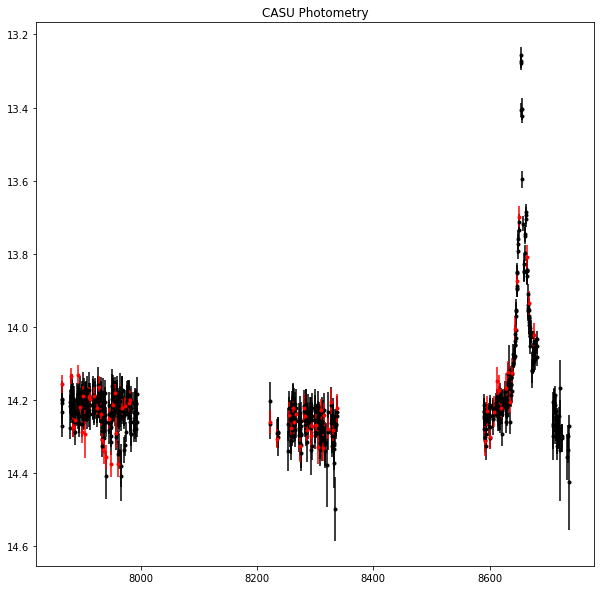

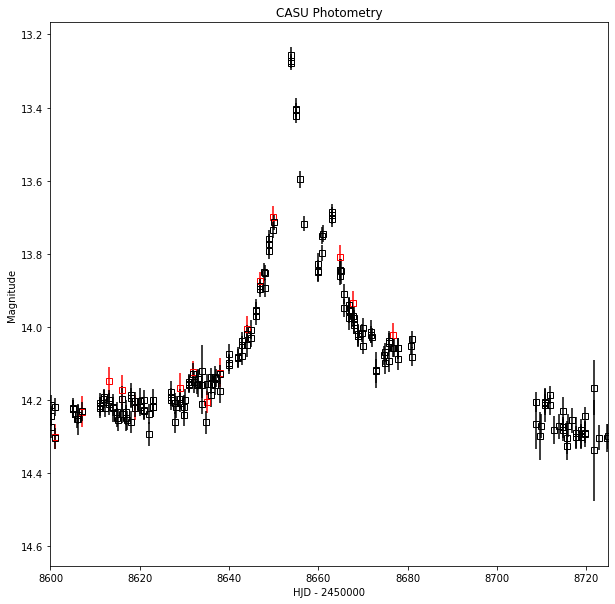

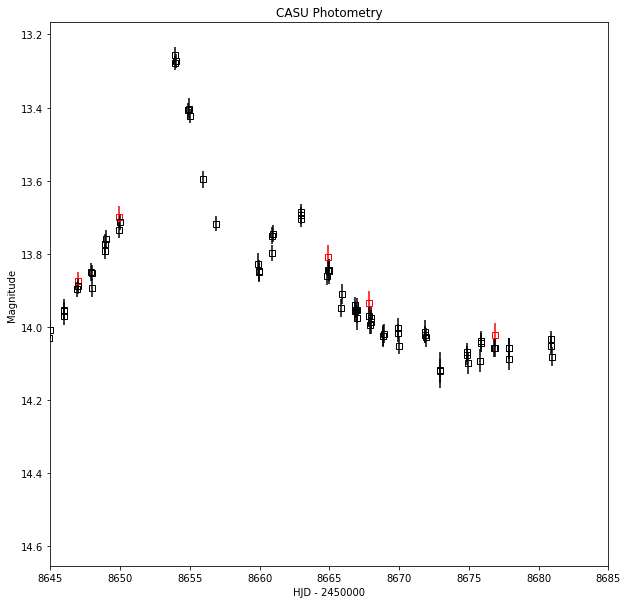

In [3]:
# Plot the data
pl.figure(figsize=(10,10))
pl.errorbar(K_casu.time - 2450000, K_casu.mag, yerr=K_casu.err_mag, fmt='.k')
pl.errorbar(H_casu.time - 2450000, H_casu.mag, yerr=H_casu.err_mag, fmt='.r')
pl.title('CASU Photometry')
pl.gca().invert_yaxis()
pl.show()

pl.figure(figsize=(10,10))
pl.errorbar(H_casu.time - 2450000, H_casu.mag, yerr=H_casu.err_mag, fmt='sr',markerfacecolor='none')
pl.errorbar(K_casu.time - 2450000, K_casu.mag, yerr=K_casu.err_mag, fmt='sk',markerfacecolor='none')
pl.xlim(8600,8725)
#pl.ylim(13.2,14.3)
pl.xlabel('HJD - 2450000')
pl.ylabel('Magnitude')
pl.title('CASU Photometry')
pl.gca().invert_yaxis()
#pl.savefig('2019_c2_4_4_H_P71224.png', format='png', dpi=1200)
pl.show()

pl.figure(figsize=(10,10))
pl.errorbar(H_casu.time - 2450000, H_casu.mag, yerr=H_casu.err_mag, fmt='sr',markerfacecolor='none')
pl.errorbar(K_casu.time - 2450000, K_casu.mag, yerr=K_casu.err_mag, fmt='sk',markerfacecolor='none')
pl.xlim(8645,8685)
#pl.ylim(13.2,14.3)
pl.xlabel('HJD - 2450000')
pl.ylabel('Magnitude')
pl.title('CASU Photometry')
pl.gca().invert_yaxis()
#pl.savefig('2019_c2_4_4_H_P71224.png', format='png', dpi=1200)
pl.show()


In [ ]:

dir_psf = '/Users/adrianhernandez/JPL_2021/ukirt_psf/'
psf_data = glob(f"{dir_psf}/*P71224*.txt")

flns = psf_data[0][44:77]
print(flns)
ukirt_casu_H = np.loadtxt(psf_data[0], usecols=range(3)) #H band data 
ukirt_casu_K = np.loadtxt(psf_data[2], usecols=range(3)) # K band data 
H_psf = mm.MulensData(file_name=psf_data[0]) #used only for the mulens code 
K_psf = mm.MulensData(file_name=psf_data[2]) #used only for the mulens code

In [ ]:
pl.figure(figsize=(10,10))
pl.errorbar(K_psf.time - 2450000, K_psf.mag, yerr=K_psf.err_mag, fmt='.r')
pl.errorbar(H_psf.time - 2450000, H_psf.mag, yerr=H_psf.err_mag, fmt='.k')
pl.title('PSF Photometry')
pl.gca().invert_yaxis()
pl.show()

pl.figure(figsize=(10,10))
pl.errorbar(H_psf.time - 2450000, H_psf.mag, yerr=H_psf.err_mag, fmt='sk',markerfacecolor='none')
pl.errorbar(K_psf.time - 2450000, K_psf.mag, yerr=K_psf.err_mag, fmt='sr',markerfacecolor='none')
pl.xlim(8600,8725)
#pl.ylim(13.2,14.3)
pl.xlabel('HJD - 2450000')
pl.ylabel('Magnitude')
pl.title('PSF Photometry')
pl.gca().invert_yaxis()
#pl.savefig('2019_c2_4_4_H_P71224.png', format='png', dpi=1200)
pl.show()

pl.figure(figsize=(10,10))
pl.errorbar(H_psf.time - 2450000, H_psf.mag, yerr=H_psf.err_mag, fmt='sk',markerfacecolor='none')
pl.errorbar(K_psf.time - 2450000, K_psf.mag, yerr=K_psf.err_mag, fmt='sr',markerfacecolor='none')
pl.xlim(8645,8685)
#pl.ylim(13.2,14.3)
pl.xlabel('HJD - 2450000')
pl.ylabel('Magnitude')
pl.title('PSF Photometry')
pl.gca().invert_yaxis()
#pl.savefig('2019_c2_4_4_H_P71224.png', format='png', dpi=1200)
pl.show()

## Best fit model for s > 1 with CASU data

MCMC was used to find t_o, u_o, and t_E. Holding these values fixed, grids were generated for s & q while rho and alpha were fit at each point in the grid. The grid for parameter s ranged from .599 to 1.49 while the grid for parameter q ranged from 0.00005 to 0.1. The parameters s, q, rho, and alpha are fit using a scipy minimization routine. Where rho and alpha are set as free parameters and fit at each point in the grid. The minimized function is then passed into an additional routine that updates each free parameter and recalculates chi squared taking into account source and blending fluxes. The result is a large grid with chi squared calculated for each row in the grid where each row represents a model. 

<table>
<thead>
        <caption style="text-align:Middle">Example output for grid fitting</caption>
  <tr>
    <th>Chi squared</th>
    <th>t_0</th>
    <th>u_0</th>
    <th>t_E</th>
    <th>s</th>
    <th>q</th>
    <th>Rho</th>
    <th>alpha</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Chi Squared</td>
    <td>Fixed</td>
    <td>Fixed</td>
    <td>Fixed</td>
    <td>Grid Point</td>
    <td>Grid Point</td>
    <td>Free Parameter</td>
    <td>Free Parameter</td>
  </tr>
</tbody>
</table>

To find the best fit model we choose the 8 grid models with lowest chi squared and refine the minima by placing the 8 models into the same minimization routine as describe above but this time keeping all parameters open as free parameters to be fit. The result is a single model with chi squared minminized. 

    
<table>
<thead>
        <caption style="text-align:Middle">Best fit parameters for s > 1</caption>
  <tr>
    <th>Chi Squared</th>
    <th>t_0</th>
    <th>u_0</th>
    <th>t_E</th>
    <th>s</th>
    <th>q</th>
    <th>Rho</th>
    <th>alpha</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>1927.454</td> 
    <td>2458653.50731</td>
    <td>0.041189</td>
    <td>43.3148</td>
    <td>1.35031</td>
    <td>0.02642772</td>
    <td>0.01887</td>
    <td>-10.99199</td>
  </tr>
</tbody>
</table>

## Plot of best fit model with caustics

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/MulensModel-1.17.15-py3.8-macosx-10.9-x86_64.egg/MulensModel/model.py:453: FutureWarning: Keyword "color_list" is deprecated. Use MulensData.plot_properties instead.
  warnings.warn('Keyword "' + old_keyword + '" is deprecated.' +
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/MulensModel-1.17.15-py3.8-macosx-10.9-x86_64.egg/MulensModel/model.py:453: FutureWarning: Keyword "label_list" is deprecated. Use MulensData.plot_properties instead.
  warnings.warn('Keyword "' + old_keyword + '" is deprecated.' +
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/MulensModel-1.17.15-py3.8-macosx-10.9-x86_64.egg/MulensModel/model.py:453: FutureWarning: Keyword "zorder_list" is deprecated. Use MulensData.plot_properties instead.
  warnings.warn('Keyword "' + old_keyword + '" is deprecated.' +


(-0.2, 0.2)

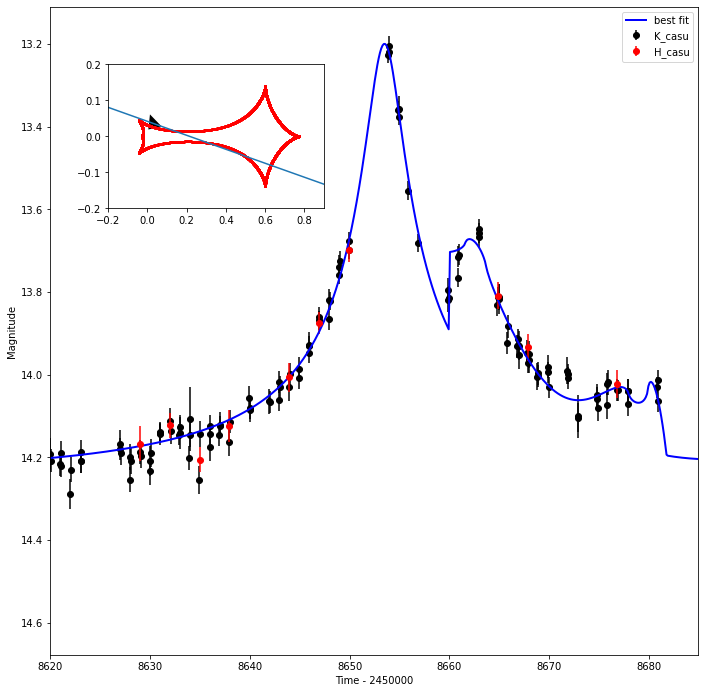

In [5]:
# ***Set time range of planetary perturbation (including 2450000).***
(t_planet_start, t_planet_stop) = (2458660.,2458690.)

# ***Set time range of planetary perturbation (including 2450000).***

# *Set the magnification methods for the planet model*
# VBBL method will be used between t_planet_start and t_planet_stop, 
# and point_source_point_lens will be used everywhere else.
magnification_methods = [0, 'point_source_point_lens', 
    t_planet_start, 'VBBL', t_planet_stop, 
    'point_source_point_lens', 2459000.]

# magnification_methods = [0, 'point_source_point_lens', 
#     t_planet_start, 'VBBL', t_planet_stop, 
#     'point_source_point_lens', 2459000.]


best_model = mm.Model({ 't_0': 2458653.50731 , 'u_0': 0.041189 , 't_E': 43.3148 ,
'rho':0.01887, 'q': 0.02642772  , 's': 1.35031 , 'alpha': -10.99199})
best_model.set_magnification_methods(magnification_methods)
best_event = mm.Event(datasets=[H_casu,K_casu], model=best_model)


pl.figure(figsize=(10,10))
pl.axes ([0.09 , 0.08 , 0.9 , 0.9])
best_event.plot_data (subtract_2450000 = True , label_list =['H_casu','K_casu'] ,color_list=['red','black'] , 
zorder_list =[2 , 1] , s =6)
best_event.plot_model(subtract_2450000 = True , lw=2, color = 'blue',label = 'best fit')
pl.xlim(8620,8685)
pl.legend ( loc ='best')

pl.axes([0.17 , 0.7 , 0.3 , 0.2]) # Figure inset stars here .
best_model.plot_trajectory (caustics = True)
pl.xlim ( -0.20 , 0.9)
pl.ylim ( -0.2 , 0.2)

## Best fit model for s < 1 with CASU data 

In general there are two solutions 